In [3]:
import os 
import sys
sys.path.append(os.path.abspath("../src"))

from log_reg import LogReg
from data_gen import CancerData

import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

In [2]:
plt.style.use('../plot_settings.mplstyle')

In [3]:
data = CancerData() 
x_data = np.array(data.x)
y_data = np.array(data.y).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=4155)
inputs = (X_train, X_test)
targets = (y_train, y_test)

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


In [4]:
input_shape = 30
output_shape = 1
epochs = 50

In [5]:
learning_rates = [0.1, 0.01, 0.001]
optimizers = ["Constant", "Momentum", "Adagrad", "Adagrad_Momentum", "Adam", "RMSprop"]
batch_size = 200

In [6]:
test_loss = []
test_acc = []

initial_l2_param = 0.1

for optimizer in optimizers:
    for learning_rate in learning_rates:
        model = LogReg(input_shape, output_shape, initial_l2_param, optimizer)
        model.train_model(inputs, targets, epochs, learning_rate, batch_size)
        final_loss = model.loss[-1]
        final_acc = model.accuracy[-1]
        test_loss.append(final_loss)
        test_acc.append(final_acc)

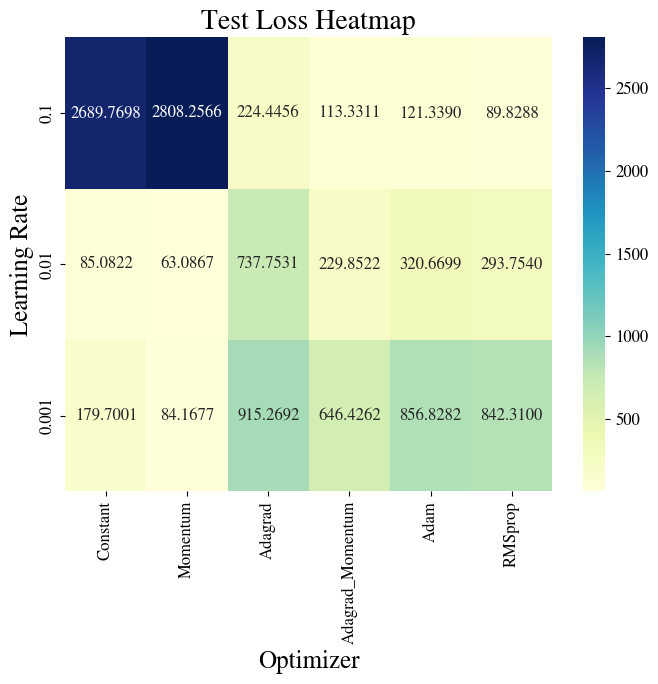

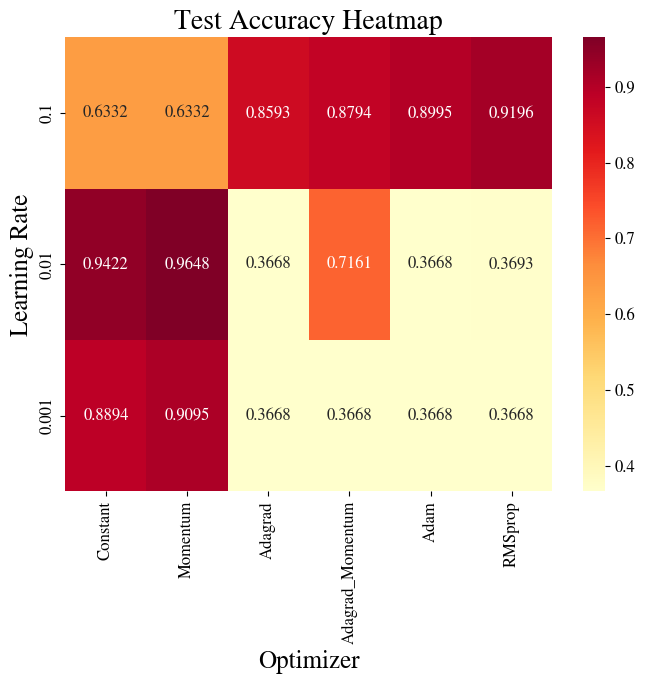

The highest accuracy is 0.964824120603015 with optimizer Momentum and learning rate 0.01


In [7]:
loss_matrix = np.array(test_loss).reshape(len(optimizers), len(learning_rates))
acc_matrix = np.array(test_acc).reshape(len(optimizers), len(learning_rates))

# Create heatmaps for test loss and test accuracy
plt.figure(figsize=(7, 7))

# Heatmap for test loss
sns.heatmap(loss_matrix.T, annot=True, fmt=".4f", xticklabels=optimizers, yticklabels=learning_rates, cmap="YlGnBu")
plt.title("Test Loss Heatmap")
plt.xlabel("Optimizer")
plt.ylabel("Learning Rate")
plt.grid(False)
plt.tight_layout()

plt.savefig("../figures/logreg_loss_heatmap.png")

plt.show()

# Heatmap for test accuracy
plt.figure(figsize=(7, 7))
sns.heatmap(acc_matrix.T, annot=True, fmt=".4f", xticklabels=optimizers, yticklabels=learning_rates, cmap="YlOrRd")
plt.title("Test Accuracy Heatmap")
plt.xlabel("Optimizer")
plt.ylabel("Learning Rate")
plt.grid(False)
plt.tight_layout()

plt.savefig("../figures/logreg_acc_heatmap.png")

plt.show()

# highest accuracy
highest_acc = np.max(acc_matrix)
highest_acc_idx = np.argmax(acc_matrix)
opt_idx = highest_acc_idx // len(learning_rates)
best_optimizer = optimizers[opt_idx]
best_lr = learning_rates[highest_acc_idx % len(learning_rates)]
print(f"The highest accuracy is {highest_acc} with optimizer {best_optimizer} and learning rate {best_lr}")

In [8]:
# continuing with the best optimizer and learning rate

test_loss_best = []
test_acc_best = []

ridge_lambdas = np.array([0]) + np.logspace(-3, 1, 5)


for l2_lambda in ridge_lambdas:
    model = LogReg(input_shape, output_shape, l2_lambda, best_optimizer, multiple_accuracy_funcs=False)
    model.train_model(inputs, targets, epochs, best_lr, batch_size)
    final_loss_best = model.loss[-1]
    final_acc_best = model.accuracy[-1]
    test_loss_best.append(final_loss_best)
    test_acc_best.append(final_acc_best)

In [9]:
best_lambda_idx = np.argmax(test_acc_best)
best_lambda = ridge_lambdas[best_lambda_idx]
print(f"The best lambda is {best_lambda}")

# the accuracy for the best lambda
best_acc = test_acc_best[best_lambda_idx]
print(f"The best accuracy is {best_acc}")

The best lambda is 1.0
The best accuracy is 0.9698492462311558


In [10]:
# train the best model with multiple accuracy functions
accuracies = []
recall = []
precision = []
f1 = []

long_epochs = 500

model = LogReg(input_shape, output_shape, best_lambda, best_optimizer, multiple_accuracy_funcs=True)
model.train_model(inputs, targets, long_epochs, best_lr, batch_size)
accuracy, recall, precision, f1 = zip(*model.test_accuracy)

In [12]:
final_accuracy = accuracy[-1]
final_recall = recall[-1]
final_precision = precision[-1]
final_f1 = f1[-1]

print(f"Final accuracy: {final_accuracy:.2f}")
print(f"Final precision: {final_precision:.2f}")
print(f"Final recall: {final_recall:.2f}")
print(f"Final f1: {final_f1:.2f}")

Final accuracy: 0.97
Final precision: 0.96
Final recall: 0.97
Final f1: 0.96
